首先是 a = b 和 a = b[:]区别

In [2]:
a = [1, 2, 3]
b = a
print(a)
print(b)

[1, 2, 3]
[1, 2, 3]


In [3]:
# 说明 a b 指向的是同一对象
# 对象赋值实际上是拷贝了这个对象的引用
print(id(a))
print(id(b))

1540800390536
1540800390536


In [4]:
#说明a b指向的是不同对象 b = a[:] 是先将a指向的文件复制一份作为副本
#然后创建一个指向该副本的快捷方式b，所以a b指向的对象不同
b = a[:]
print(id(a))
print(id(b))

1540800390536
1540803363400


In [13]:
#1.切片操作
a = [1, 2, 3, [4, 5]]
b = a[:]
b[3][0] = 7
print(a)
print(b)

[1, 2, 3, [7, 5]]
[1, 2, 3, [7, 5]]


In [14]:
#2.工厂函数 list(),dict()等
a = (1, 2, 3, [4, 5])
b = list(a)
b[3][0] = 7
print(a)
print(b)

(1, 2, 3, [7, 5])
[1, 2, 3, [7, 5]]


In [16]:
#copy.copy()
import copy
a = (1, 2, 3, [4, 5])
b = copy.copy(a)
b[3][0] = 7
print(a)
print(b)

(1, 2, 3, [7, 5])
(1, 2, 3, [7, 5])


In [17]:
l1 = [1, 2, [3, 4]]
l2 = l1.copy()
l1[0] = 9
print(l1)
print(l2)

[9, 2, [3, 4]]
[1, 2, [3, 4]]


In [18]:
l1[2].append(5)
print(l1)
print(l2)

[9, 2, [3, 4, 5]]
[1, 2, [3, 4, 5]]


In [23]:
# 首先分清 可变对象 和 不可变对象
# 常见的不可变对象  数字，字符串，元组
x = 1
y = x
print(id(x) == id(y))
print(id(1) == id(y))

True
True


In [24]:
# 修改x x = x+1
x = x+1
print(id(x) == id(y))
print(id(1) == id(y))
# 证明 数字 是不可变对象，值改变了，地址就改变

False
True


In [25]:
# 特例 不可变不意味着绝对的不可变
a = ([1], 2, 3)
print(id(a))
print(id(a[0]))

1540802738504
1540802787784


In [26]:
a[0][0] = 0
print(id(a))
print(id(a[0]))

1540802738504
1540802787784


深拷贝 浅拷贝 官方定义：
The difference between shallow and deep copying is only relevant for compound objects (objects that contain other objects, like lists or
class instances).
A shallow copy constructs a new compound object and then (to the
extent possible) inserts the same objects into it that the
original contains.
A deep copy constructs a new compound object and then, recursively,inserts copies into it of the objects found in the original.

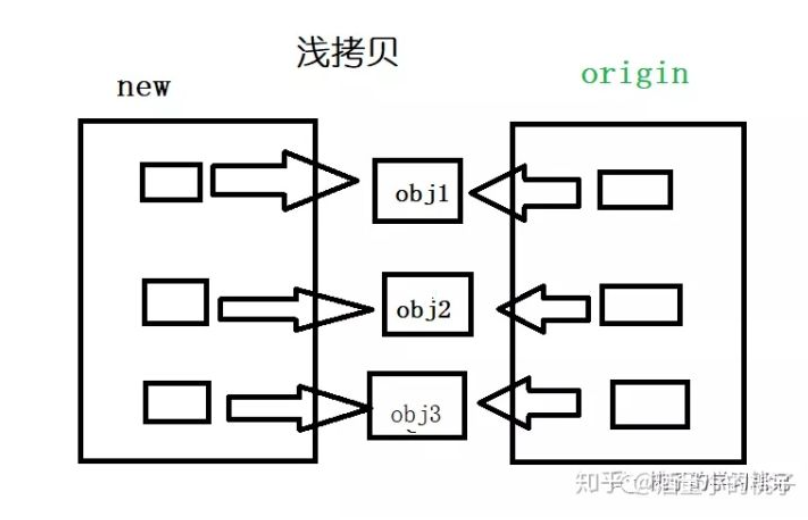

从上图中不难看出，浅拷贝之后，新的对象包含的对象（可变，不可变）的id值，和原有对象包含的对象的id值相同

In [37]:
# 举例
import copy
a = [1, 2, [3, 4]]
b = a.copy()
print(id(a[0]) == id(b[0]))
print(id(a[2]) == id(b[2]))
print(id(a[2][0]) == id(b[2][0]))

True
True
True


In [29]:
# 接下来 试着修改b的值，先修改b[0] （不可变对象），看a有什么变化
b[0] = 5
print(b)
print(a)

[5, 2, [3, 4]]
[1, 2, [3, 4]]


In [ ]:
果然a没变化，根据不可变变量修改规则，b【0】会绑定到新的变量上，
而由于a【0】没有修改，则保持不变。

In [ ]:
# 接下来 试着修改b【2】，由于b【2】绑定的对象是list，属于可变对象。
#按照上面所说的 可变对象修改规则，修改后的b【2】的id值 保持不变，
#但是其 value 会发生改变。下边验证一下

In [31]:
b[2][0] = 6
print(b)
print(a)
print(id(b[2]))
print(id(a[2]))

[5, 2, [6, 4]]
[1, 2, [6, 4]]
1540802897416
1540802897416


In [ ]:
#深拷贝

In [ ]:
深拷贝构建一个对象，然后递归的将原有复合包含的对象的副本插入到新的复合对象中

In [ ]:
下图所示：深拷贝后，新的复合对象包好的对象。
若对象为不可变对象，则id值不变。
若对象为可变对象，则id值改变。

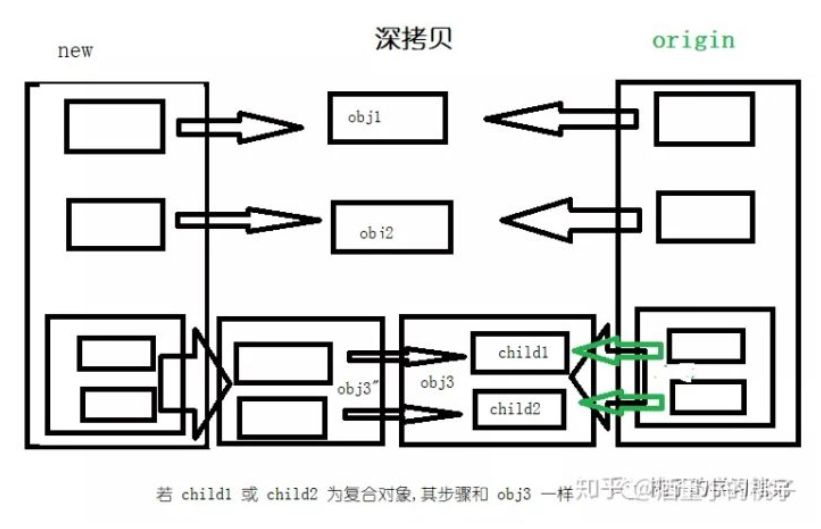

In [32]:
#举例
a = [1, 2, [3, 4]]
b = copy.deepcopy(a)
print(id(a[0]) == id(b[0]))

True


In [33]:
print(id(b[2]) == id(a[2]))

print(id(b[2][0]) == id(a[2][0]))

False
True


In [35]:
a[2][0] = 6
print(a)
print(b)

[1, 2, [6, 4]]
[1, 2, [3, 4]]


In [ ]:
#可见 修改了a里边的不可变对象a【2】【0】，b不会变化。

In [20]:
# 浅拷贝
import copy

a = [([1], 2, 3), [4, 5]]
b = a.copy()
a[0][0][0] = 0

print(a)

print(b)

[([0], 2, 3), [4, 5]]
[([0], 2, 3), [4, 5]]


In [27]:
a = [(1, 2, 3), [4, 5]]
b = a.copy()

a[0] = (7, 8)
print(a)
print(b)

[(7, 8), [4, 5]]
[(1, 2, 3), [4, 5]]


注意 
1. 非容器类型（比如）容器类型（比如数字、字符串和其他“原子”类型的对象，像代码、类型和xrange对象等）没有拷贝一说，浅拷贝是用完全切片操作来完成的。

2. 如果元组变量只包含原子类型对象，对他的拷贝将不会进行，即使使用深拷贝操作也只能得到一个浅拷贝。

参考：
https://baijiahao.baidu.com/s?id=1627356407968660842&wfr=spider&for=pc

https://blog.csdn.net/FU250/article/details/94638864?depth_1-utm_source=distribute.pc_relevant.none-task&utm_source=distribute.pc_relevant.none-task

https://www.cnblogs.com/wilber2013/p/4645353.html